In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initialisation of parameters
N_E = 10000 # Excitatory population
N_I = 10000 # Inhibitory population
K_CNC = 1000 # Average connections
THETA_E = 1 # Excitatory neuron threshold 
THETA_I = 0.8 # Inhibitory neuron threshold
D_THETA = 0.3 # Variation of threshold(theta ~ theta+d_theta)
TAU = 0.9 # Inhibitory update time gap
# Weight
J_EE = 1
J_EI = -2
J_IE = 1
J_II = -1.7
CONST_E = 1
CONST_I = 0.7
CONST_M0 = 0.1

TIME_SPAN = 100

spike_e = np.zeros((N_E, TIME_SPAN))
u_e = np.zeros((N_E, TIME_SPAN))

spike_i = np.zeros((N_I, TIME_SPAN))
u_i = np.zeros((N_I, TIME_SPAN))


upd_time = np.zeros((2, N_E, TIME_SPAN))

upd_time[0] = np.random.exponential(size = (1, N_E, TIME_SPAN), scale = 1)
upd_time[1] = np.random.exponential(size = (1, N_I, TIME_SPAN), scale = TAU)
upd_time = np.cumsum(upd_time, axis = 2)
index = np.unravel_index(np.argsort(upd_time, axis = None), upd_time.shape)



# plt.plot(TIME_SPAN, np.sum(spike_o, axis = 0))

# Generation of threshold of neurons
theta_e = np.random.uniform(low = THETA_E, high = THETA_E+D_THETA, size = N_E)
theta_i = np.random.uniform(low = THETA_I, high = THETA_I+D_THETA, size = N_I)


# Generation of connections between neurons
c_ee = J_EE / np.sqrt(K_CNC) * np.random.binomial(1, K_CNC/N_E, size = (N_E, N_E))
c_ei = J_EI / np.sqrt(K_CNC) * np.random.binomial(1, K_CNC/N_E, size = (N_E, N_I))

c_ie = J_IE / np.sqrt(K_CNC) * np.random.binomial(1, K_CNC/N_I, size = (N_I, N_E))
c_ii = J_II / np.sqrt(K_CNC) * np.random.binomial(1, K_CNC/N_I, size = (N_I, N_I))

h_ee = np.zeros((N_E, TIME_SPAN))
h_ei = np.zeros((N_E, TIME_SPAN))

h_ii = np.zeros((N_I, TIME_SPAN))
h_ie = np.zeros((N_I, TIME_SPAN))

u_E0 = CONST_E * CONST_M0 * np.sqrt(K_CNC)
u_I0 = CONST_I * CONST_M0 * np.sqrt(K_CNC)


for i in range(1, np.prod(upd_time.shape)):
    print('\rCurrent time is {} / {}'.format(int(upd_time[index[0][i], index[1][i], index[2][i]]), int(np.max(upd_time))), end=' ')
    if index[0][i] == 0: # update an excitatory neuron
        h_ee[index[1][i], index[2][i]] = np.dot(c_ee[index[1][i]], spike_e[:, index[2][i]])
        h_ei[index[1][i], index[2][i]] = np.dot(c_ei[index[1][i]], spike_i[:, index[2][i]])
        u_e[index[1][i], index[2][i]] = h_ee[index[1][i], index[2][i]] + h_ei[index[1][i], index[2][i]] + u_E0 - theta_e[index[1][i]]
        if u_e[index[1][i], index[2][i]] > 0:
            spike_e[index[1][i], index[2][i]] = 1
    else: # update an inhibitory neuron
        h_ie[index[1][i], index[2][i]] = np.dot(c_ie[index[1][i]], spike_e[:, index[2][i]])
        h_ii[index[1][i], index[2][i]] = np.dot(c_ii[index[1][i]], spike_i[:, index[2][i]])
        u_i[index[1][i], index[2][i]] = h_ie[index[1][i], index[2][i]] + h_ii[index[1][i], index[2][i]] + u_I0 - theta_i[index[1][i]]
        if u_i[index[1][i], index[2][i]] > 0:
            spike_i[index[1][i], index[2][i]] = 1


Current time is 149 / 149 

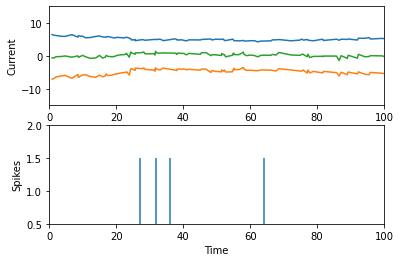

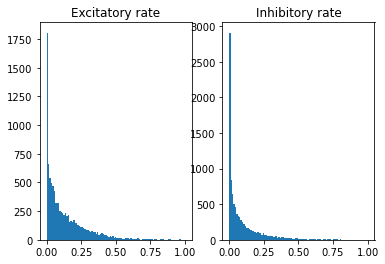

Experimental RATE_E = 0.13, RATE_I = 0.10
Theoretical RATE_E = 0.10, RATE_I = 0.10


In [2]:
# Excitatory input, inhibitory input and net input to a certain cell
choix = np.random.randint(low = 0, high = N_E)
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(upd_time[0][choix, :], h_ee[choix] + u_E0)
ax1.plot(upd_time[0][choix, :], h_ei[choix])
ax1.plot(upd_time[0][choix, :], h_ee[choix]+h_ei[choix] + u_E0)
ax1.set_ylabel('Current')
ax1.set_xlabel(' ')
ax1.axes.set_ylim(bottom = -15, top = 15)
ax1.axes.set_xlim(left = 0, right = TIME_SPAN)

ax2.eventplot(np.nonzero(spike_e[choix]))
ax2.axes.set_ylim(bottom = 0.5, top = 2)
ax2.axes.set_xlim(left = 0, right = TIME_SPAN)
ax2.set_ylabel('Spikes')
ax2.set_xlabel('Time')
plt.show()


plt.subplot(1,2,1)
plt.hist(np.count_nonzero(spike_e, axis = 1)/TIME_SPAN, bins = np.linspace(0, 1, num = 100))
plt.title('Excitatory rate')
plt.subplot(1,2,2)
plt.hist(np.count_nonzero(spike_i, axis = 1)/TIME_SPAN, bins = np.linspace(0, 1, num = 100))
plt.title('Inhibitory rate')
plt.show()
print('Experimental RATE_E = {:.2f}, RATE_I = {:.2f}'.format(np.mean(np.count_nonzero(spike_e, axis = 1))/TIME_SPAN, np.mean(np.count_nonzero(spike_i, axis = 1))/TIME_SPAN))
rate_e, rate_i = -np.dot(np.linalg.inv(np.array([[J_EE, J_EI], [J_IE, J_II]])), np.array([CONST_E, CONST_I])) * CONST_M0
print('Theoretical RATE_E = {:.2f}, RATE_I = {:.2f}'.format(rate_e, rate_i))



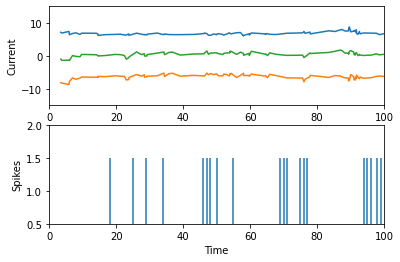

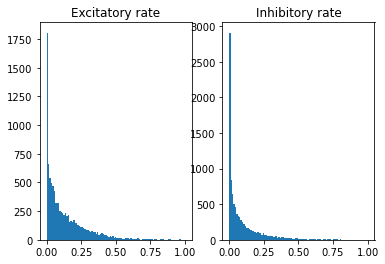

Experimental RATE_E = 0.13, RATE_I = 0.10
Theoretical RATE_E = 0.10, RATE_I = 0.10


In [3]:
# Excitatory input, inhibitory input and net input to a certain cell
choix = np.random.randint(low = 0, high = N_E)
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(upd_time[0][choix, :], h_ee[choix] + u_E0)
ax1.plot(upd_time[0][choix, :], h_ei[choix])
ax1.plot(upd_time[0][choix, :], h_ee[choix]+h_ei[choix] + u_E0)
ax1.set_ylabel('Current')
ax1.set_xlabel(' ')
ax1.axes.set_ylim(bottom = -15, top = 15)
ax1.axes.set_xlim(left = 0, right = TIME_SPAN)

ax2.eventplot(np.nonzero(spike_e[choix]))
ax2.axes.set_ylim(bottom = 0.5, top = 2)
ax2.axes.set_xlim(left = 0, right = TIME_SPAN)
ax2.set_ylabel('Spikes')
ax2.set_xlabel('Time')
plt.show()


plt.subplot(1,2,1)
plt.hist(np.count_nonzero(spike_e, axis = 1)/TIME_SPAN, bins = np.linspace(0, 1, num = 100))
plt.title('Excitatory rate')
plt.subplot(1,2,2)
plt.hist(np.count_nonzero(spike_i, axis = 1)/TIME_SPAN, bins = np.linspace(0, 1, num = 100))
plt.title('Inhibitory rate')
plt.show()
print('Experimental RATE_E = {:.2f}, RATE_I = {:.2f}'.format(np.mean(np.count_nonzero(spike_e, axis = 1))/TIME_SPAN, np.mean(np.count_nonzero(spike_i, axis = 1))/TIME_SPAN))
rate_e, rate_i = -np.dot(np.linalg.inv(np.array([[J_EE, J_EI], [J_IE, J_II]])), np.array([CONST_E, CONST_I])) * CONST_M0
print('Theoretical RATE_E = {:.2f}, RATE_I = {:.2f}'.format(rate_e, rate_i))



In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Initialisation of parameters
N_E = 5000 # Excitatory population
N_I = 5000 # Inhibitory population
N_O = 5000 # Excitatory population outside of the network
K_CNC = 500 # Average connections
THETA_E = 1.0 # Excitatory neuron threshold 
THETA_I = 0.8 # Inhibitory neuron threshold
D_THETA = 0.3 # Variation of threshold(theta ~ theta+d_theta)
TAU = 0.9 # Inhibitory update time gap
TIME_SPAN = 80

# Weight
J_EE = 1
J_EI = -2
J_IE = 1
J_II = -1.7

# Outside input parameters
CONST_E = 1
CONST_I = 0.7
m0 = np.linspace(0, 0.2, num = 10) # Outside excitatory input frequency
rate_e = np.zeros(len(m0))
rate_i = np.zeros(len(m0))



spike_e = np.zeros((N_E, TIME_SPAN))
u_e = np.zeros((N_E, TIME_SPAN))
input_e = np.zeros((N_E, TIME_SPAN))

spike_i = np.zeros((N_I, TIME_SPAN))
u_i = np.zeros((N_I, TIME_SPAN))
input_i = np.zeros((N_E, TIME_SPAN))


upd_time = np.zeros((2, N_E, TIME_SPAN))

upd_time[0] = np.random.exponential(size = (1, N_E, TIME_SPAN), scale = 1)
upd_time[1] = np.random.exponential(size = (1, N_I, TIME_SPAN), scale = TAU)
upd_time = np.cumsum(upd_time, axis = 2)
index = np.unravel_index(np.argsort(upd_time, axis = None), upd_time.shape)

# plt.plot(TIME_SPAN, np.sum(spike_o, axis = 0))

# Generation of threshold of neurons
theta_e = np.random.uniform(low = THETA_E, high = THETA_E+D_THETA, size = N_E)
theta_i = np.random.uniform(low = THETA_I, high = THETA_I+D_THETA, size = N_I)


# Generation of connections between neurons
c_ee = J_EE / np.sqrt(K_CNC) * np.random.binomial(1, K_CNC/N_E, size = (N_E, N_E))
c_ei = J_EI / np.sqrt(K_CNC) * np.random.binomial(1, K_CNC/N_E, size = (N_E, N_I))

c_ie = J_IE / np.sqrt(K_CNC) * np.random.binomial(1, K_CNC/N_I, size = (N_I, N_E))
c_ii = J_II / np.sqrt(K_CNC) * np.random.binomial(1, K_CNC/N_I, size = (N_I, N_I))


h_ee = np.zeros((N_E, TIME_SPAN))
h_ei = np.zeros((N_E, TIME_SPAN))

h_ii = np.zeros((N_I, TIME_SPAN))
h_ie = np.zeros((N_I, TIME_SPAN))

u_E0 = CONST_E * CONST_M0 * np.sqrt(K_CNC)
u_I0 = CONST_I * CONST_M0 * np.sqrt(K_CNC)

for k in range(len(m0)):
    u_E0 = CONST_E * m0[k] * np.sqrt(K_CNC)
    u_I0 = CONST_I * m0[k] * np.sqrt(K_CNC)
    for i in range(0, np.prod(upd_time.shape)):
        print('\rCurrent round:{} / {} Current time: {} / {}'.format(k+1 , len(m0), int(upd_time[index[0][i], index[1][i], index[2][i]]), int(np.max(upd_time))), end=' ')
        if index[0][i] == 0: # update an excitatory neuron
            h_ee[index[1][i], index[2][i]] = np.dot(c_ee[index[1][i]], spike_e[:, index[2][i]])
            h_ei[index[1][i], index[2][i]] = np.dot(c_ei[index[1][i]], spike_i[:, index[2][i]])
            u_e[index[1][i], index[2][i]] = h_ee[index[1][i], index[2][i]] + h_ei[index[1][i], index[2][i]] + u_E0 - theta_e[index[1][i]]
            if u_e[index[1][i], index[2][i]] > 0:
                spike_e[index[1][i], index[2][i]] = 1
        else: # update an inhibitory neuron
            h_ie[index[1][i], index[2][i]] = np.dot(c_ie[index[1][i]], spike_e[:, index[2][i]])
            h_ii[index[1][i], index[2][i]] = np.dot(c_ii[index[1][i]], spike_i[:, index[2][i]])
            u_i[index[1][i], index[2][i]] = h_ie[index[1][i], index[2][i]] + h_ii[index[1][i], index[2][i]] + u_I0 - theta_i[index[1][i]]
            if u_i[index[1][i], index[2][i]] > 0:
                spike_i[index[1][i], index[2][i]] = 1
    rate_e[k] = np.mean(np.count_nonzero(spike_e, axis = 1))/TIME_SPAN
    rate_i[k] = np.mean(np.count_nonzero(spike_i, axis = 1))/TIME_SPAN


Current round:10 / 10 Current time: 116 / 116 

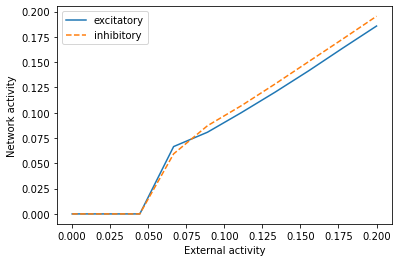

In [5]:
plt.plot(m0, rate_e, label = 'excitatory')
plt.plot(m0, rate_i, label = 'inhibitory', linestyle = '--')
plt.xlabel('External activity')
plt.ylabel('Network activity')
plt.legend()
plt.show()




In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Initialisation of parameters
N_E = 10000 # Excitatory population
N_I = 10000 # Inhibitory population
N_O = 10000 # Excitatory population outside of the network
K_CNC = 1000 # Average connections
THETA_E = 1.0 # Excitatory neuron threshold 
THETA_I = 0.8 # Inhibitory neuron threshold
D_THETA = 0.3 # Variation of threshold(theta ~ theta+d_theta)
TAU = 1 # Inhibitory update time gap
TIME_SPAN = 100

# Weight
J_EE = 1
J_EI = -2
J_IE = 1
J_II = -1.7
CONST_E = 1
CONST_I = 0.7

m0 = np.append(np.append(0.06*np.ones(int(0.1*TIME_SPAN)), np.linspace(0.06,0.24,num = int(0.1*TIME_SPAN))), 0.24*np.ones(int(0.8*TIME_SPAN)))
rate_e = np.zeros(len(m0))
rate_i = np.zeros(len(m0))


spike_e = np.zeros((N_E, TIME_SPAN))
u_e = np.zeros((N_E, TIME_SPAN))
input_e = np.zeros((N_E, TIME_SPAN))

spike_i = np.zeros((N_I, TIME_SPAN))
u_i = np.zeros((N_I, TIME_SPAN))
input_i = np.zeros((N_E, TIME_SPAN))


upd_time = np.zeros((2, N_E, TIME_SPAN))

upd_time[0] = np.random.exponential(size = (1, N_E, TIME_SPAN), scale = 1)
upd_time[1] = np.random.exponential(size = (1, N_E, TIME_SPAN), scale = TAU)
upd_time = np.cumsum(upd_time, axis = 2)
index = np.unravel_index(np.argsort(upd_time, axis = None), upd_time.shape)

# Generation of threshold of neurons
theta_e = np.random.uniform(low = THETA_E, high = THETA_E+D_THETA, size = N_E)
theta_i = np.random.uniform(low = THETA_I, high = THETA_I+D_THETA, size = N_I)



# Generation of connections between neurons
c_ee = J_EE / np.sqrt(K_CNC) * np.random.binomial(1, K_CNC/N_E, size = (N_E, N_E))
c_ei = J_EI / np.sqrt(K_CNC) * np.random.binomial(1, K_CNC/N_E, size = (N_E, N_I))

c_ie = J_IE / np.sqrt(K_CNC) * np.random.binomial(1, K_CNC/N_I, size = (N_I, N_E))
c_ii = J_II / np.sqrt(K_CNC) * np.random.binomial(1, K_CNC/N_I, size = (N_I, N_I))


h_ee = np.zeros((N_E, TIME_SPAN))
h_ei = np.zeros((N_E, TIME_SPAN))

h_ii = np.zeros((N_I, TIME_SPAN))
h_ie = np.zeros((N_I, TIME_SPAN))

u_E0 = CONST_E * m0[0] * np.sqrt(K_CNC)
u_I0 = CONST_I * m0[0] * np.sqrt(K_CNC)
time = -1

for i in range(0, np.prod(upd_time.shape)):
    print('\rCurrent time is {} / {}'.format(int(upd_time[index[0][i], index[1][i], index[2][i]]), int(np.max(upd_time))), end=' ')
    if index[0][i] == 0: # update an excitatory neuron
        h_ee[index[1][i], index[2][i]] = np.dot(c_ee[index[1][i]], spike_e[:, index[2][i]])
        h_ei[index[1][i], index[2][i]] = np.dot(c_ei[index[1][i]], spike_i[:, index[2][i]])
        u_e[index[1][i], index[2][i]] = h_ee[index[1][i], index[2][i]] + h_ei[index[1][i], index[2][i]] + u_E0 - theta_e[index[1][i]]
        if u_e[index[1][i], index[2][i]] > 0:
            spike_e[index[1][i], index[2][i]] = 1
    else: # update an inhibitory neuron
        h_ie[index[1][i], index[2][i]] = np.dot(c_ie[index[1][i]], spike_e[:, index[2][i]])
        h_ii[index[1][i], index[2][i]] = np.dot(c_ii[index[1][i]], spike_i[:, index[2][i]])
        u_i[index[1][i], index[2][i]] = h_ie[index[1][i], index[2][i]] + h_ii[index[1][i], index[2][i]] + u_I0 - theta_i[index[1][i]]
        if u_i[index[1][i], index[2][i]] > 0:
            spike_i[index[1][i], index[2][i]] = 1
    if time != int(upd_time[index[0][i], index[1][i], index[2][i]]) and time < TIME_SPAN - 1:
        time = int(upd_time[index[0][i], index[1][i], index[2][i]])
        u_E0 = CONST_E * m0[time] * np.sqrt(K_CNC)
        u_I0 = CONST_I * m0[time] * np.sqrt(K_CNC)
        rate_e[time] = np.count_nonzero(spike_e[:, time])/N_E
        rate_i[time] = np.count_nonzero(spike_i[:, time])/N_I


Current time is 143 / 143 

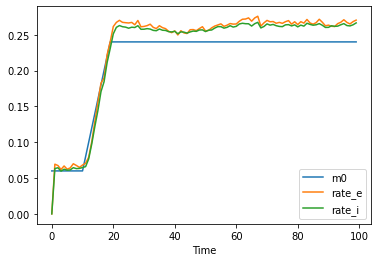

In [7]:
plt.plot(range(0, TIME_SPAN), m0, label = 'm0')
plt.plot(range(0, TIME_SPAN), rate_e, label = 'rate_e')
plt.plot(range(0, TIME_SPAN), rate_i, label = 'rate_i')
plt.xlabel('Time')
plt.legend()
plt.show()



    